# ECE558 Project
By Tuo and Yucan

## Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Other utilities
import time
from IPython.utils import io

with io.capture_output() as captured:
    import meep as mp
    from meep import mpb

from simulation import *

## Geometry variants

### Strip with PC only

epsilon: 2.4087-12.0647, mean 2.42455, harm. mean 2.41227, 100% > 1, 0.164063% "fill"


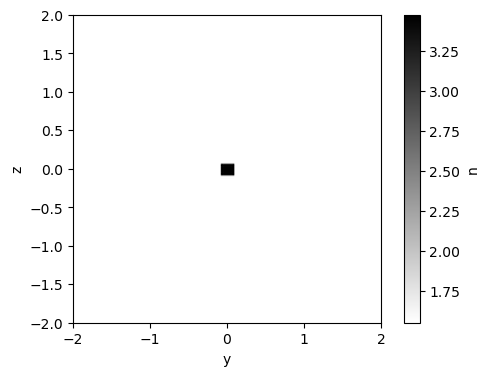

0.175 [1.5592816739124835, 1.5572081991633016, 1.5219193008784089, 1.518183575046769]
epsilon: 2.5536-12.0647, mean 2.56921, harm. mean 2.55731, 100% > 1, 0.164062% "fill"


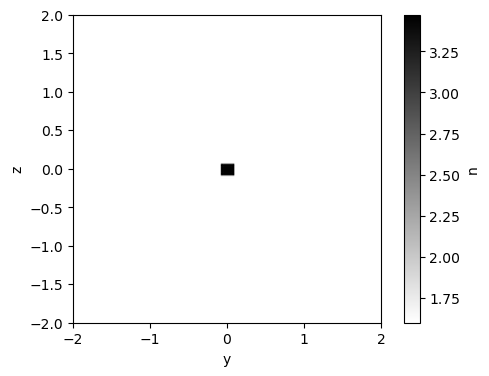

0.175 [1.605640728238239, 1.603449801521949, 1.5696974215001769, 1.5659877033756926]


In [3]:
sim = Simulation()

h = 0.150  # Si height (um) # 150 nm as in Bilodeau paper
w = 0.175 # waveguide width (um) # 175 nm as in Bilodeau paper 
geometry = [mp.Block(size=mp.Vector3(mp.inf, w, h), center=mp.Vector3(), 
                        material=Simulation.Si)]

sim.init_mode_solver(geometry, default_material=Simulation.PC1)
sim.plot()
neff = sim.run()
print(w, neff)

sim.init_mode_solver(geometry, default_material=Simulation.PC2)
sim.plot()
neff = sim.run()
print(w, neff)

### Strip with PC and SiO2

epsilon: 2.08514-12.0647, mean 2.26882, harm. mean 2.24452, 100% > 1, 1.84059% "fill"


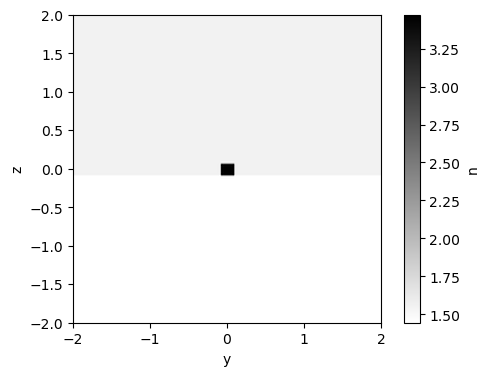

0.175 [1.5352259229159395, 1.532301160426928, 1.4926798013865221, 1.487310537060916]
epsilon: 2.08514-12.0647, mean 2.34375, harm. mean 2.30767, 100% > 1, 2.59142% "fill"


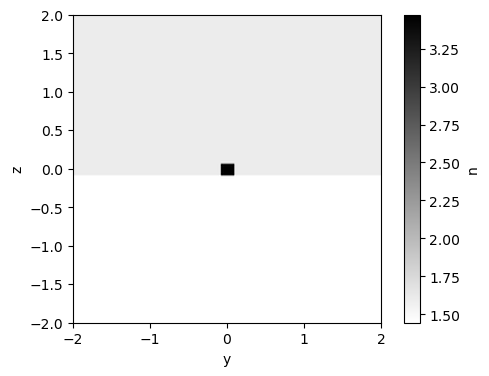

0.175 [1.578355928657709, 1.5750843378193626, 1.5355530574608336, 1.5304378751453012]


In [4]:
sc_y = 4
sc_z = 4
sim = Simulation(sc_y=sc_y, sc_z=sc_z)

h = 0.150  # Si height (um) # 150 nm as in Bilodeau paper
w = 0.175 # waveguide width (um) # 175 nm as in Bilodeau paper 
geometry = [mp.Block(size=mp.Vector3(mp.inf, w, h), center=mp.Vector3(), 
                        material=Simulation.Si),
            mp.Block(size=mp.Vector3(mp.inf, mp.inf, 0.5*sc_z-0.5*h),center=mp.Vector3(0,0,0.25*sc_z+0.25*h), 
                     material=Simulation.SiO2)]

sim.init_mode_solver(geometry, default_material=Simulation.PC1)
sim.plot()
neff = sim.run()
print(w, neff)

sim.init_mode_solver(geometry, default_material=Simulation.PC2)
sim.plot()
neff = sim.run()
print(w, neff)

### Strip with Multiple Waveguide Blocks (PC only)

epsilon: 2.4087-12.0647, mean 2.45623, harm. mean 2.41944, 100% > 1, 0.492188% "fill"


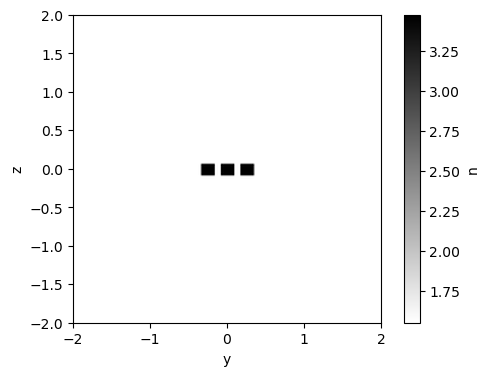

0.175 [1.699912977689264, 1.5943985486677041, 1.5445850181970857, 1.5378710925215373]
epsilon: 2.5536-12.0647, mean 2.60042, harm. mean 2.56478, 100% > 1, 0.492187% "fill"


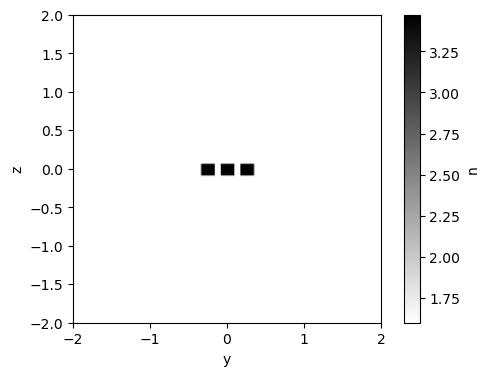

0.175 [1.7470421075722142, 1.6434627467263163, 1.5908403233551955, 1.5849234992351193]


In [11]:
sc_y = 4
sc_z = 4
sim = Simulation(sc_y=sc_y, sc_z=sc_z)

blocks = 3
ws = 0.08
h = 0.150  # Si height (um) # 150 nm as in Bilodeau paper
w = 0.175 # waveguide width (um) # 175 nm as in Bilodeau paper 
geometry = [ *[mp.Block(size=mp.Vector3(mp.inf, w, h), 
                        center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w /2, 0), 
                        material=Simulation.Si) for x in range(blocks)] ]

sim.init_mode_solver(geometry, default_material=Simulation.PC1)
sim.plot()
neff = sim.run()
print(w, neff)

sim.init_mode_solver(geometry, default_material=Simulation.PC2)
sim.plot()
neff = sim.run()
print(w, neff)

### Strip with Multiple Waveguide Blocks (PC and SiO2)

epsilon: 2.08514-12.0647, mean 2.3005, harm. mean 2.25079, 100% > 1, 2.15801% "fill"


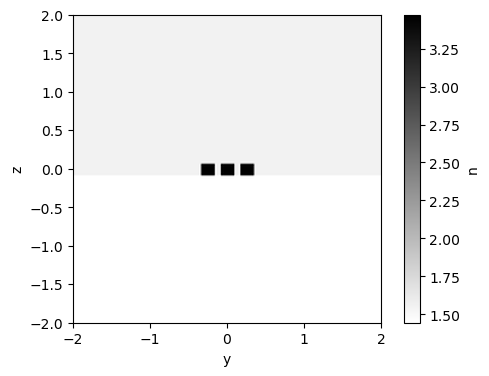

0.175 [1.668635642518965, 1.5556045136943255, 1.5234810117018642, 1.50970325877411]
epsilon: 2.08514-12.0647, mean 2.37495, harm. mean 2.31383, 100% > 1, 2.90407% "fill"


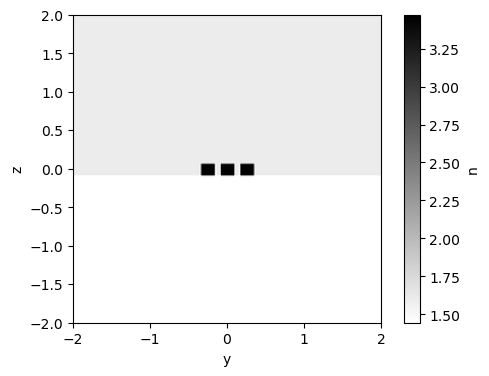

0.175 [1.705184797308483, 1.5947771682924945, 1.5675744417402586, 1.5515561009711527]


In [12]:
sc_y = 4
sc_z = 4
sim = Simulation(sc_y=sc_y, sc_z=sc_z)

blocks = 3
ws = 0.08
h = 0.150  # Si height (um) # 150 nm as in Bilodeau paper
w = 0.175 # waveguide width (um) # 175 nm as in Bilodeau paper 
geometry = [ *[mp.Block(size=mp.Vector3(mp.inf, w, h), 
                        center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w / 2, 0), 
                        material=Simulation.Si) for x in range(blocks)],
            mp.Block(size=mp.Vector3(mp.inf, mp.inf, 0.5*sc_z-0.5*h),center=mp.Vector3(0,0,0.25*sc_z+0.25*h), 
                     material=Simulation.SiO2)]

sim.init_mode_solver(geometry, default_material=Simulation.PC1)
sim.plot()
neff = sim.run()
print(w, neff)

sim.init_mode_solver(geometry, default_material=Simulation.PC2)
sim.plot()
neff = sim.run()
print(w, neff)

### Strip with Multiple Waveguide Blocks (PC and SiO2 in between blocks)

epsilon: 2.08514-12.0647, mean 2.45572, harm. mean 2.41893, 100% > 1, 3.7134% "fill"


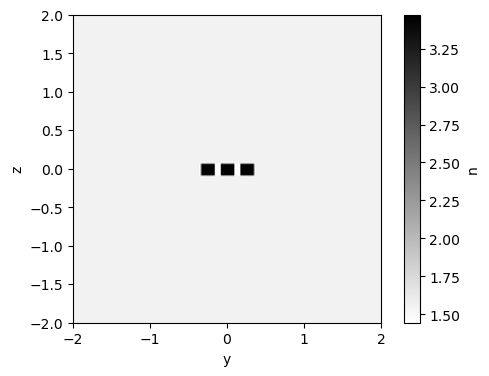

KeyboardInterrupt: 

In [6]:
sc_y = 4
sc_z = 4
sim = Simulation(sc_y=sc_y, sc_z=sc_z)

blocks = 3
ws = 0.08
h = 0.150  # Si height (um) # 150 nm as in Bilodeau paper
w = 0.175 # waveguide width (um) # 175 nm as in Bilodeau paper 
geometry = [ *[mp.Block(size=mp.Vector3(mp.inf, w, h), 
                        center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w / 2, 0), 
                        material=Simulation.Si) for x in range(blocks)],
             *[mp.Block(size=mp.Vector3(mp.inf, ws, h),
                        center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w + ws / 2, 0), 
                        material=Simulation.SiO2) for x in range(blocks - 1)] ]

sim.init_mode_solver(geometry, default_material=Simulation.PC1)
sim.plot()
neff = sim.run()
print(w, neff)

sim.init_mode_solver(geometry, default_material=Simulation.PC2)
sim.plot()
neff = sim.run()
print(w, neff)

### Strip with Multiple Waveguide Blocks (PC, SiO2 bottom, and SiO2 in between blocks)

epsilon: 2.08514-12.0647, mean 2.3, harm. mean 2.25035, 100% > 1, 2.153% "fill"


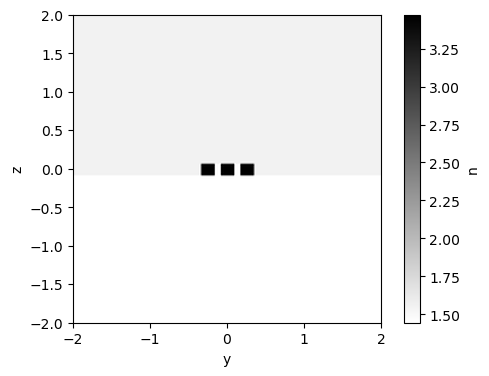

0.175 [1.634424655415669, 1.554437455262568, 1.5224152941652251, 1.5092260789412462]
epsilon: 2.08514-12.0647, mean 2.37423, harm. mean 2.3132, 100% > 1, 2.89688% "fill"


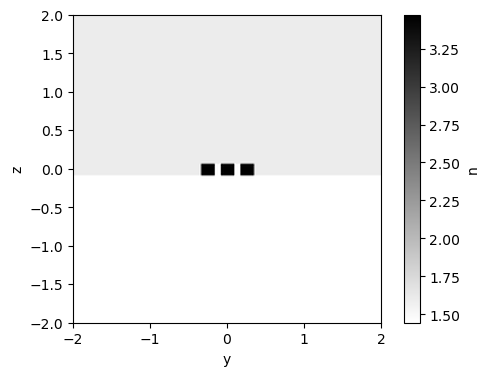

0.175 [1.6588340498568825, 1.5932802097453298, 1.5658008552070237, 1.5507460115499896]


In [29]:
sc_y = 4
sc_z = 4
sim = Simulation(sc_y=sc_y, sc_z=sc_z)

blocks = 3
ws = 0.08
h = 0.150  # Si height (um) # 150 nm as in Bilodeau paper
w = 0.175 # waveguide width (um) # 175 nm as in Bilodeau paper 
geometry = [ *[mp.Block(size=mp.Vector3(mp.inf, w, h), 
                        center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w / 2, 0), 
                        material=Simulation.Si) for x in range(blocks)],
             *[mp.Block(size=mp.Vector3(mp.inf, ws, h),
                        center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w + ws / 2, 0), 
                        material=Simulation.SiO2) for x in range(blocks - 1)],
            mp.Block(size=mp.Vector3(mp.inf, mp.inf, 0.5*sc_z-0.5*h),center=mp.Vector3(0,0,0.25*sc_z+0.25*h), 
                     material=Simulation.SiO2)]

sim.init_mode_solver(geometry, default_material=Simulation.PC1)
sim.plot()
neff = sim.run()
print(w, neff)

sim.init_mode_solver(geometry, default_material=Simulation.PC2)
sim.plot()
neff = sim.run()
print(w, neff)

## Sweep all parameters for each variant

### Set up all the possible settings

In [3]:
## For each setting
# [ name: str,  blocks: int, w_range: [range of w], ws_range: [range of ws], geometry: lambda (w, ws, blocks): [mp.GeometricObject]]
sc_y = 4
sc_z = 4
h = 0.150  # Si height (um) # 150 nm as in Bilodeau paper

settings = [
    ("S1", 1, np.linspace(0.1, 1.6, 76), [0], 
     lambda w, ws, blocks: [mp.Block(size=mp.Vector3(mp.inf, w, h), center=mp.Vector3(), material=Simulation.Si)], ),
    ("S1+SiO2", 1, np.linspace(0.1, 1.6, 76), [0],
     lambda w, ws, blocks: [mp.Block(size=mp.Vector3(mp.inf, w, h), center=mp.Vector3(),  material=Simulation.Si), 
                            mp.Block(size=mp.Vector3(mp.inf, mp.inf, 0.5*sc_z-0.5*h),center=mp.Vector3(0,0,0.25*sc_z+0.25*h), material=Simulation.SiO2)]),
    
    ("S2", 2, np.linspace(0.1, 0.91, 28),np.linspace(0.02, 0.98, 25),
     lambda w, ws, blocks: [ *[mp.Block(size=mp.Vector3(mp.inf, w, h), center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w /2, 0), 
                                        material=Simulation.Si) for x in range(blocks)] ]),
    ("S2+SiO2_b", 2, np.linspace(0.1, 0.91, 28),np.linspace(0.02, 0.98, 25),
     lambda w, ws, blocks: [ *[mp.Block(size=mp.Vector3(mp.inf, w, h), center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w / 2, 0), 
                                        material=Simulation.Si) for x in range(blocks)],
                            mp.Block(size=mp.Vector3(mp.inf, mp.inf, 0.5*sc_z-0.5*h),center=mp.Vector3(0,0,0.25*sc_z+0.25*h), material=Simulation.SiO2)]),
    ("S2+SiO2_m", 2, np.linspace(0.1, 0.91, 28),np.linspace(0.02, 0.98, 25),
     lambda w, ws, blocks: [ *[mp.Block(size=mp.Vector3(mp.inf, w, h), center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w / 2, 0), 
                                        material=Simulation.Si) for x in range(blocks)],
                            *[mp.Block(size=mp.Vector3(mp.inf, ws, h), center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w + ws / 2, 0), 
                                       material=Simulation.SiO2) for x in range(blocks - 1)] ]),
    ("S2+SiO2_bm", 2, np.linspace(0.1, 0.91, 28),np.linspace(0.02, 0.98, 25),
     lambda w, ws, blocks: [ *[mp.Block(size=mp.Vector3(mp.inf, w, h), center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w / 2, 0), 
                                        material=Simulation.Si) for x in range(blocks)],
                            *[mp.Block(size=mp.Vector3(mp.inf, ws, h), center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w + ws / 2, 0), 
                                       material=Simulation.SiO2) for x in range(blocks - 1)],
                            mp.Block(size=mp.Vector3(mp.inf, mp.inf, 0.5*sc_z-0.5*h),center=mp.Vector3(0,0,0.25*sc_z+0.25*h), material=Simulation.SiO2)]),
    
    ("S3", 3, np.linspace(0.1, 0.91, 28), np.linspace(0.02, 0.47, 16),
     lambda w, ws, blocks: [ *[mp.Block(size=mp.Vector3(mp.inf, w, h), center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w /2, 0), 
                                        material=Simulation.Si) for x in range(blocks)] ]),
    ("S3+SiO2_b", 3, np.linspace(0.1, 0.91, 28), np.linspace(0.02, 0.47, 16),
     lambda w, ws, blocks: [ *[mp.Block(size=mp.Vector3(mp.inf, w, h), center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w / 2, 0), 
                                        material=Simulation.Si) for x in range(blocks)],
                            mp.Block(size=mp.Vector3(mp.inf, mp.inf, 0.5*sc_z-0.5*h),center=mp.Vector3(0,0,0.25*sc_z+0.25*h), material=Simulation.SiO2)]),
    ("S3+SiO2_m", 3, np.linspace(0.1, 0.91, 28), np.linspace(0.02, 0.47, 16),
     lambda w, ws, blocks: [ *[mp.Block(size=mp.Vector3(mp.inf, w, h), center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w / 2, 0), 
                                        material=Simulation.Si) for x in range(blocks)],
                            *[mp.Block(size=mp.Vector3(mp.inf, ws, h), center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w + ws / 2, 0), 
                                       material=Simulation.SiO2) for x in range(blocks - 1)] ]),
    ("S3+SiO2_bm", 3, np.linspace(0.1, 0.91, 28), np.linspace(0.02, 0.47, 16),
     lambda w, ws, blocks: [ *[mp.Block(size=mp.Vector3(mp.inf, w, h), center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w / 2, 0), 
                                        material=Simulation.Si) for x in range(blocks)],
                            *[mp.Block(size=mp.Vector3(mp.inf, ws, h), center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w + ws / 2, 0), 
                                       material=Simulation.SiO2) for x in range(blocks - 1)],
                            mp.Block(size=mp.Vector3(mp.inf, mp.inf, 0.5*sc_z-0.5*h),center=mp.Vector3(0,0,0.25*sc_z+0.25*h), material=Simulation.SiO2)]),
    
    ("S4", 4, np.linspace(0.1, 0.7, 25), np.linspace(0.02, 0.38, 13),
     lambda w, ws, blocks: [ *[mp.Block(size=mp.Vector3(mp.inf, w, h), center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w /2, 0), 
                                material=Simulation.Si) for x in range(blocks)] ]),
    ("S4+SiO2_b", 4, np.linspace(0.1, 0.7, 25), np.linspace(0.02, 0.38, 13),
     lambda w, ws, blocks: [ *[mp.Block(size=mp.Vector3(mp.inf, w, h), center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w / 2, 0), 
                                        material=Simulation.Si) for x in range(blocks)],
                            mp.Block(size=mp.Vector3(mp.inf, mp.inf, 0.5*sc_z-0.5*h),center=mp.Vector3(0,0,0.25*sc_z+0.25*h), material=Simulation.SiO2)]),
    ("S4+SiO2_m", 4, np.linspace(0.1, 0.7, 25), np.linspace(0.02, 0.38, 13),
     lambda w, ws, blocks: [ *[mp.Block(size=mp.Vector3(mp.inf, w, h), center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w / 2, 0), 
                                        material=Simulation.Si) for x in range(blocks)],
                            *[mp.Block(size=mp.Vector3(mp.inf, ws, h), center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w + ws / 2, 0), 
                                       material=Simulation.SiO2) for x in range(blocks - 1)] ]),
    ("S4+SiO2_bm", 4, np.linspace(0.1, 0.7, 25), np.linspace(0.02, 0.38, 13),
     lambda w, ws, blocks: [ *[mp.Block(size=mp.Vector3(mp.inf, w, h), center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w / 2, 0), 
                                        material=Simulation.Si) for x in range(blocks)],
                            *[mp.Block(size=mp.Vector3(mp.inf, ws, h), center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w + ws / 2, 0), 
                                       material=Simulation.SiO2) for x in range(blocks - 1)],
                            mp.Block(size=mp.Vector3(mp.inf, mp.inf, 0.5*sc_z-0.5*h),center=mp.Vector3(0,0,0.25*sc_z+0.25*h), material=Simulation.SiO2)]),
]

### Plot all settings 

epsilon: 2.4087-12.0647, mean 2.55354, harm. mean 2.44047, 100% > 1, 1.5% "fill"


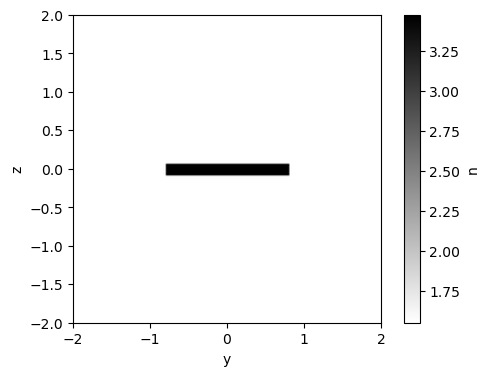

epsilon: 2.08514-12.0647, mean 2.39783, harm. mean 2.26917, 100% > 1, 3.13334% "fill"


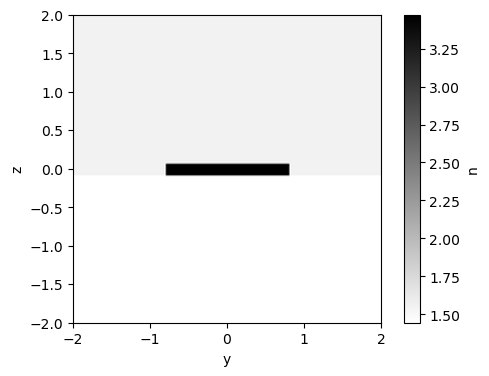

epsilon: 2.4087-12.0647, mean 2.66217, harm. mean 2.465, 100% > 1, 2.625% "fill"


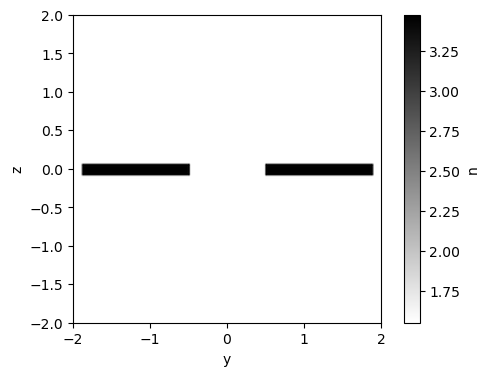

epsilon: 2.08514-12.0647, mean 2.50644, harm. mean 2.29056, 100% > 1, 4.22163% "fill"


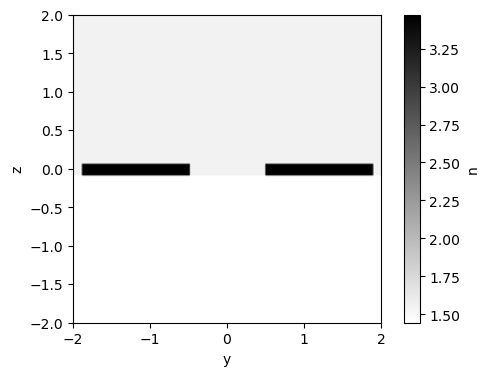

epsilon: 2.08514-12.0647, mean 2.65918, harm. mean 2.46146, 100% > 1, 5.75214% "fill"


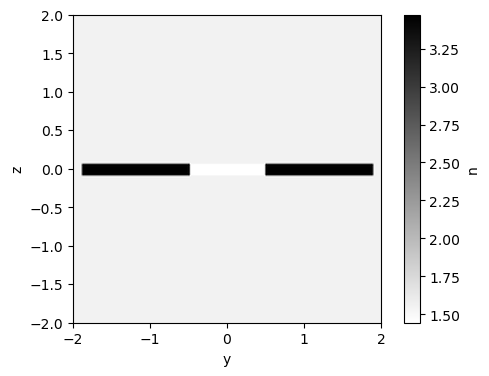

epsilon: 2.08514-12.0647, mean 2.50345, harm. mean 2.2875, 100% > 1, 4.1917% "fill"


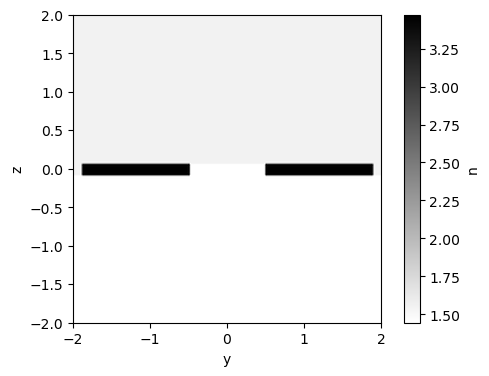

epsilon: 2.4087-12.0647, mean 2.68028, harm. mean 2.4693, 100% > 1, 2.8125% "fill"


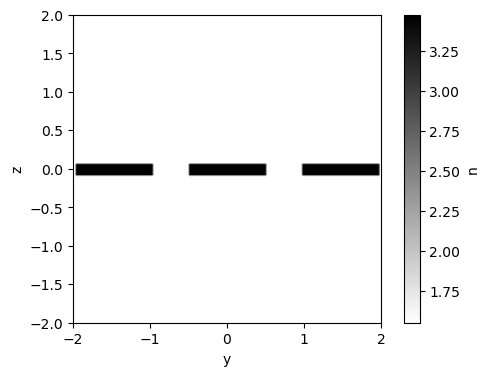

epsilon: 2.08514-12.0647, mean 2.52459, harm. mean 2.29433, 100% > 1, 4.40357% "fill"


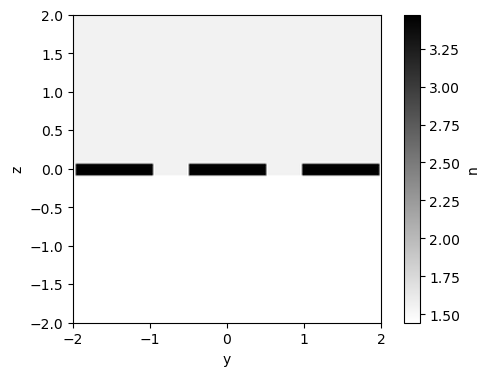

epsilon: 2.08514-12.0647, mean 2.67739, harm. mean 2.46595, 100% > 1, 5.9347% "fill"


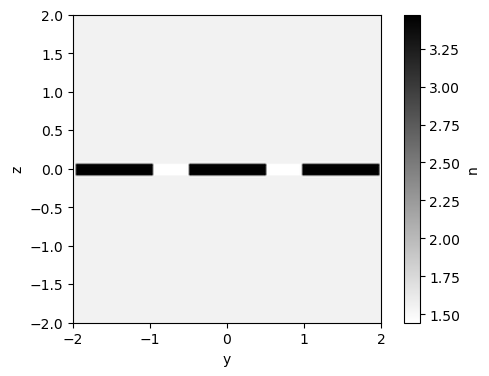

epsilon: 2.08514-12.0647, mean 2.52169, harm. mean 2.29142, 100% > 1, 4.37449% "fill"


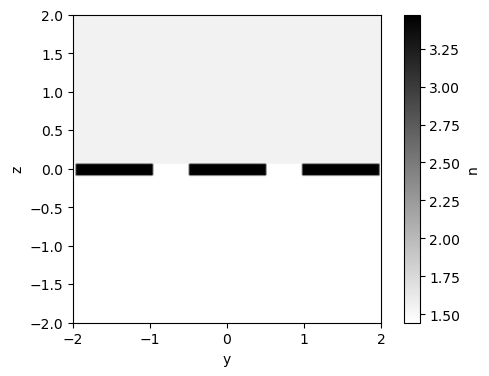

epsilon: 2.4087-12.0647, mean 2.66217, harm. mean 2.46544, 100% > 1, 2.625% "fill"


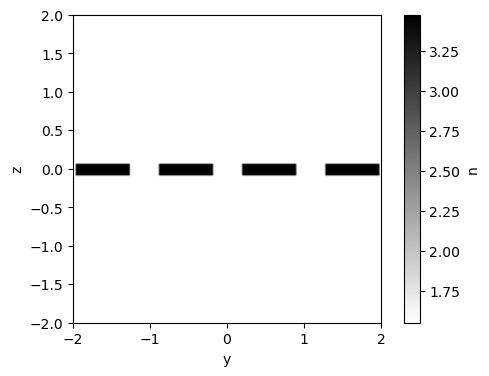

epsilon: 2.08514-12.0647, mean 2.50648, harm. mean 2.29097, 100% > 1, 4.22206% "fill"


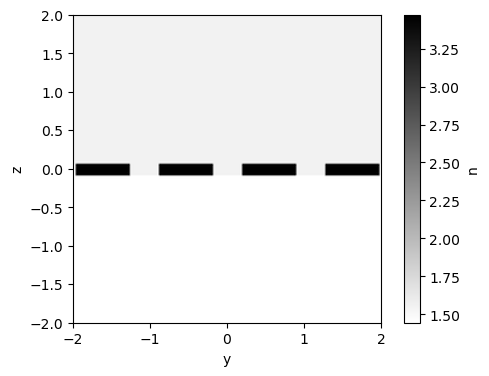

epsilon: 2.08514-12.0647, mean 2.65873, harm. mean 2.46147, 100% > 1, 5.74769% "fill"


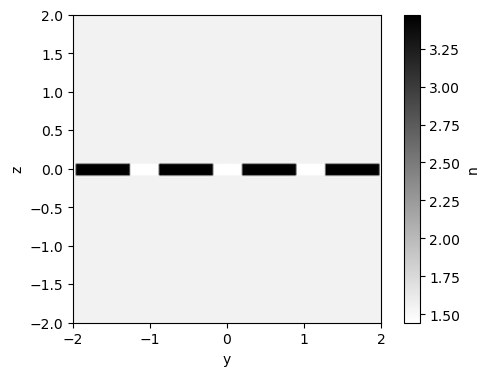

epsilon: 2.08514-12.0647, mean 2.50303, harm. mean 2.28752, 100% > 1, 4.18748% "fill"


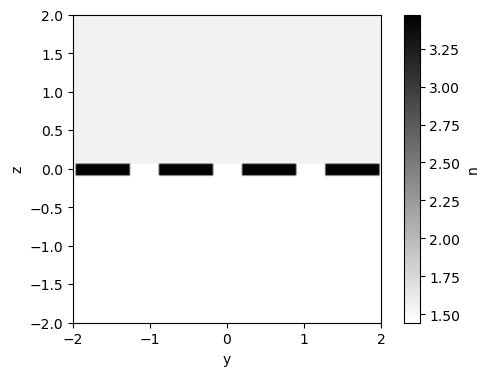

In [23]:
sim = Simulation(sc_y=sc_y, sc_z=sc_z)
for (setting, blocks, w_range, ws_range, geometry_lambda) in settings:
    neffs = np.array([len(w_range), len(ws_range), 2, 4])
    for w in w_range[-1:]:
        for ws in ws_range[-1:]:
            geometry = geometry_lambda(w, ws, blocks)
            sim.init_mode_solver(geometry, default_material=Simulation.PC1)
            sim.plot()
            break
        break


### Execute the settings

In [24]:
import asyncio

def get_path(name):
    return f"./data/sim_{name}.npy"

def simulation_execute(setting, spinner=None):
    sim = Simulation(sc_y=sc_y, sc_z=sc_z)
    (setting_name, blocks, w_range, ws_range, geometry_lambda) = setting
    neffs = np.zeros([len(w_range), len(ws_range), 2, 4])
    for w_i, w in enumerate(w_range):
        for ws_i, ws in enumerate(ws_range):
            geometry = geometry_lambda(w, ws, blocks)
            sim.init_mode_solver(geometry, default_material=Simulation.PC1)
            neff = sim.run()
            neffs[w_i][ws_i][0] = neff
            
            sim.init_mode_solver(geometry, default_material=Simulation.PC2)
            neff = sim.run()
            neffs[w_i][ws_i][1] = neff
    
    path = get_path(setting_name)
    np.save(path, neffs)
    if spinner: 
        spinner.succeed(f"Finished simulation with setting {setting_name}, saved to {path}")

from halo import Halo
with Halo(text='Simulating', spinner='dots') as spinner:
    for i, setting in enumerate(settings):
        spinner.info(f"Simulating {setting[0]} ...")
        simulation_execute(setting, spinner)
                        

## Post-processing

### Load data points and draw diagrams

In [69]:
def plot_data_line(setting, setting_data, ws=0):
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20, 10), dpi=300)

    x = setting[2]
    ax1.plot(x, [1.552] * len(x), ':', label="PC1")
    ax2.plot(x, [1.598] * len(x), ':', label="PC2")
    for mode in range(setting_data.shape[3]):
        ax1.plot(x, setting_data[:, ws, 0, mode], '.-', label=f"mode_{mode}")
        ax2.plot(x, setting_data[:, ws, 1, mode], '.-', label=f"mode_{mode}")

    # Label the last point fit the condition
    max_mode_1 = 0
    max_mode_2 = 0
    for i in range(setting_data.shape[0]):
        if np.sum(setting_data[i, ws, 0, :] > 1.552) == 2:
            max_mode_1 = i
        if np.sum(setting_data[i, ws, 1, :] > 1.598) < 2:
            max_mode_2 = i
    print(x[max_mode_1], x[max_mode_2])
    ax1.axvline(x[max_mode_1])
    ax2.axvline(x[max_mode_2])
    ax1.legend()
    ax2.legend()
    ax1.set_title(f"{setting[0]} state 1")
    ax2.set_title(f"{setting[0]} state 2")

### 1. S1

0.56 0.1


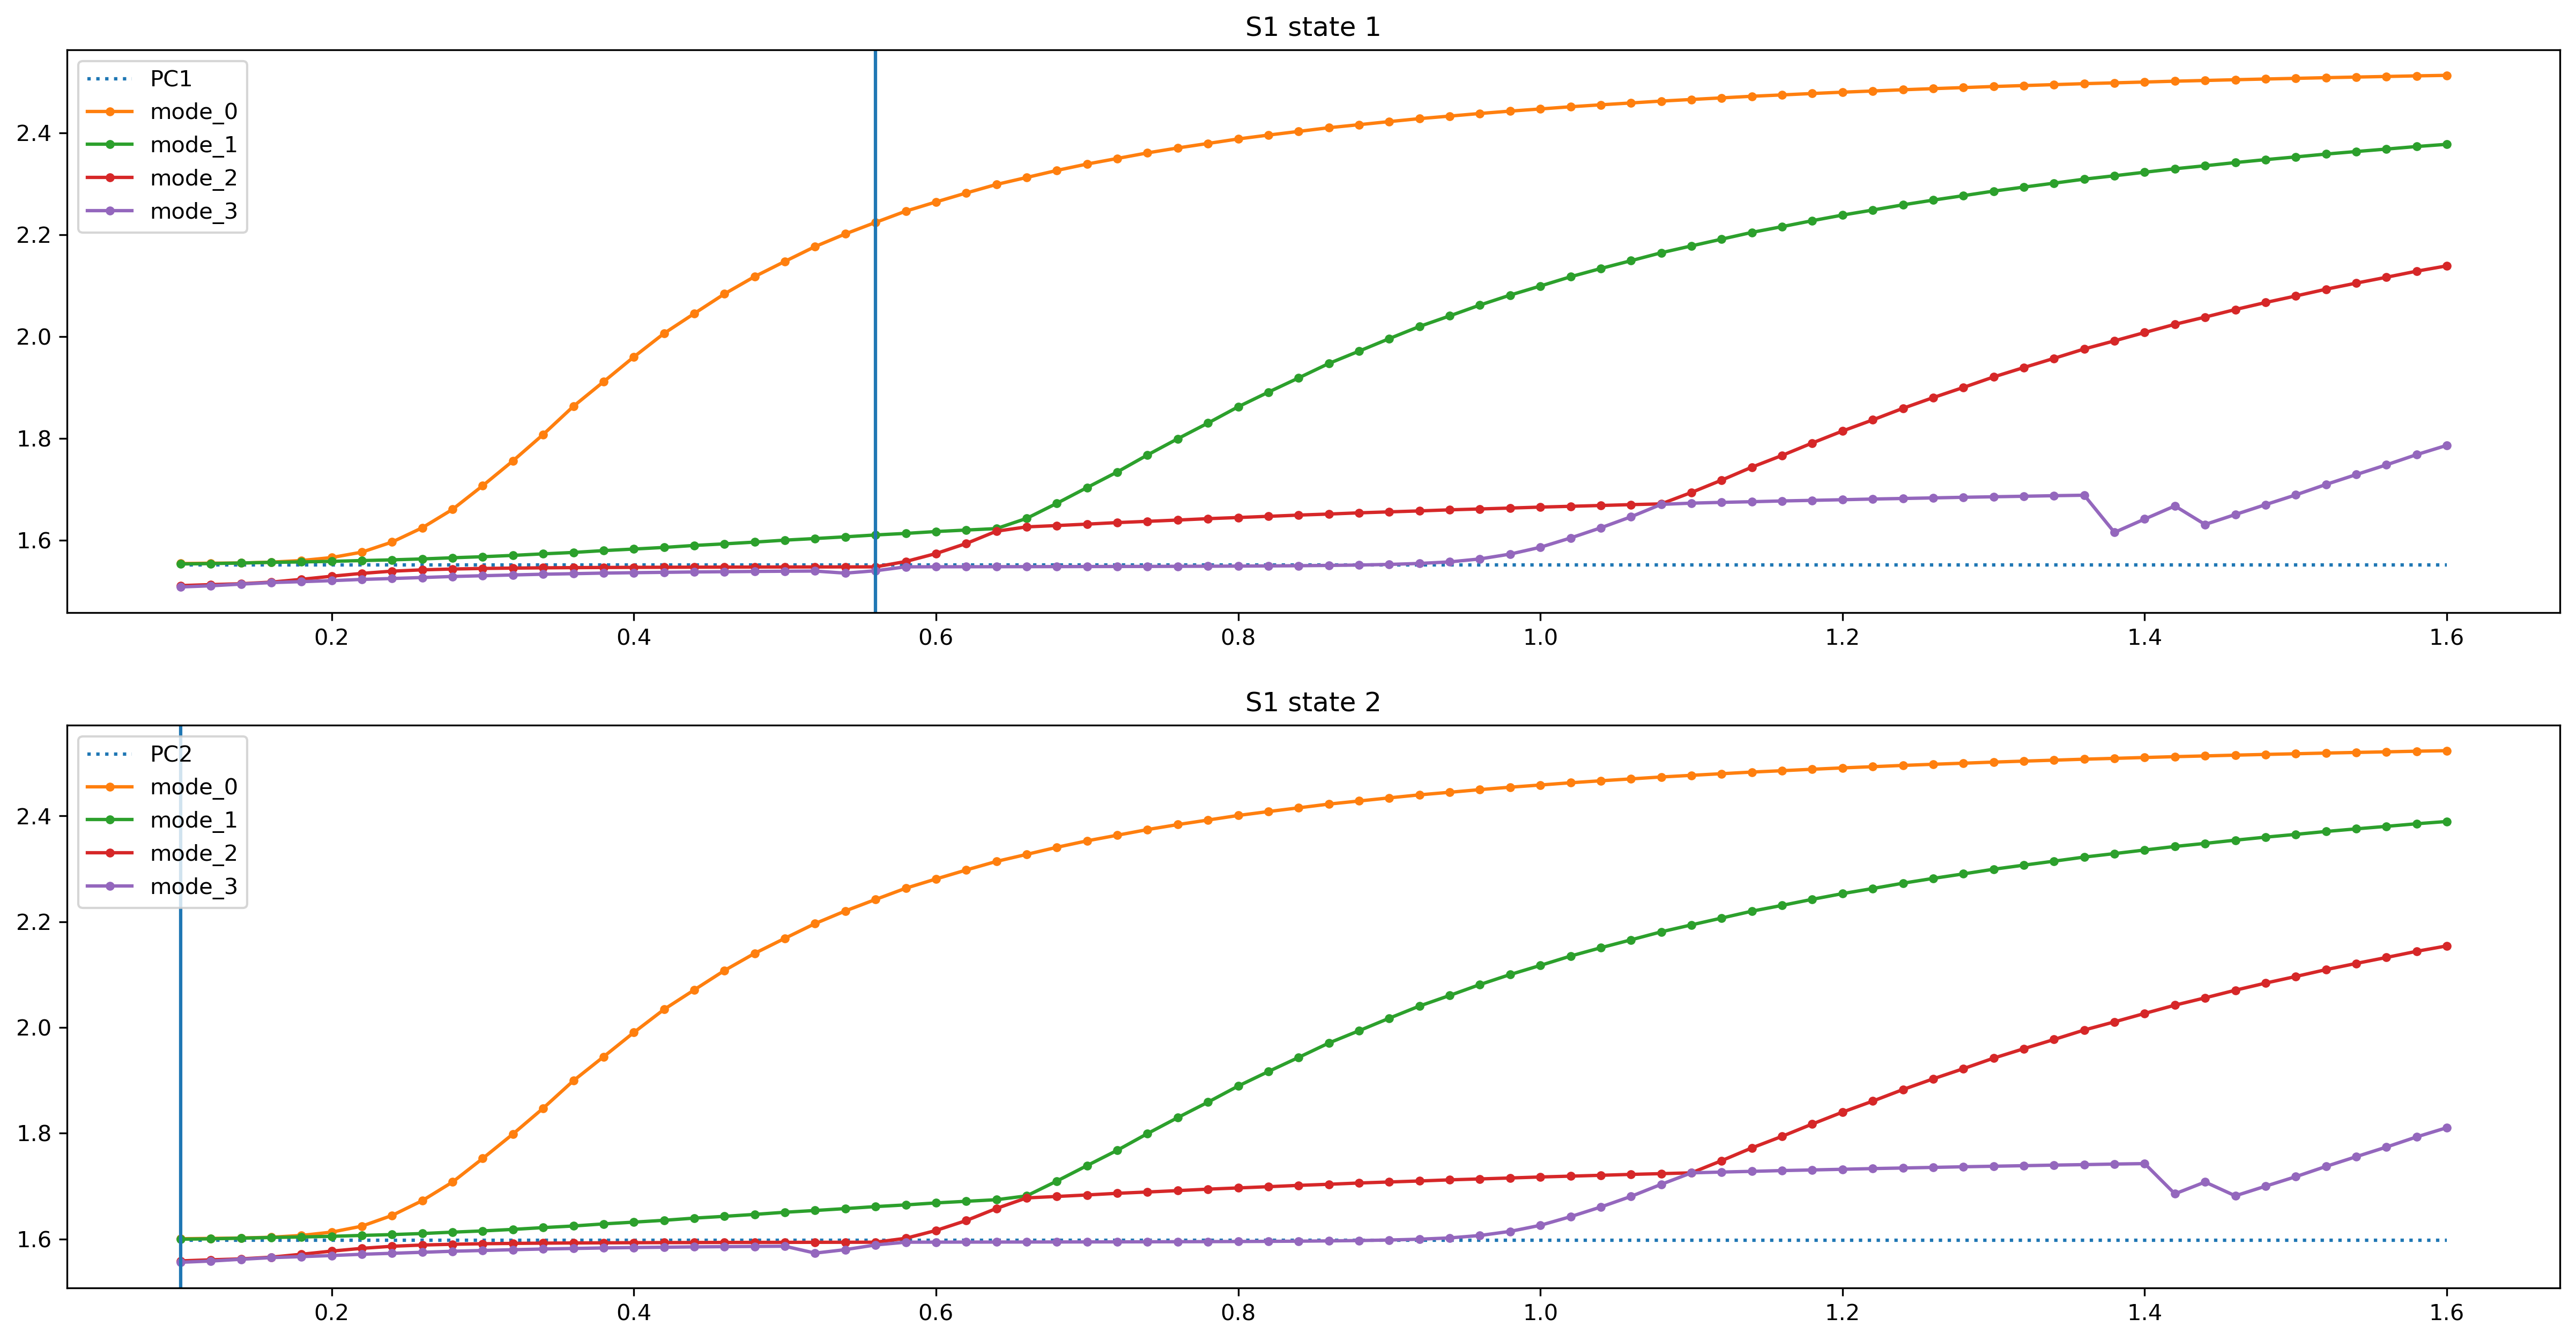

In [70]:
setting_S1 = np.load(get_path(settings[0][0]))
plot_data_line(settings[0], setting_S1)

### 2. S1 + SiO2

0.62 0.48


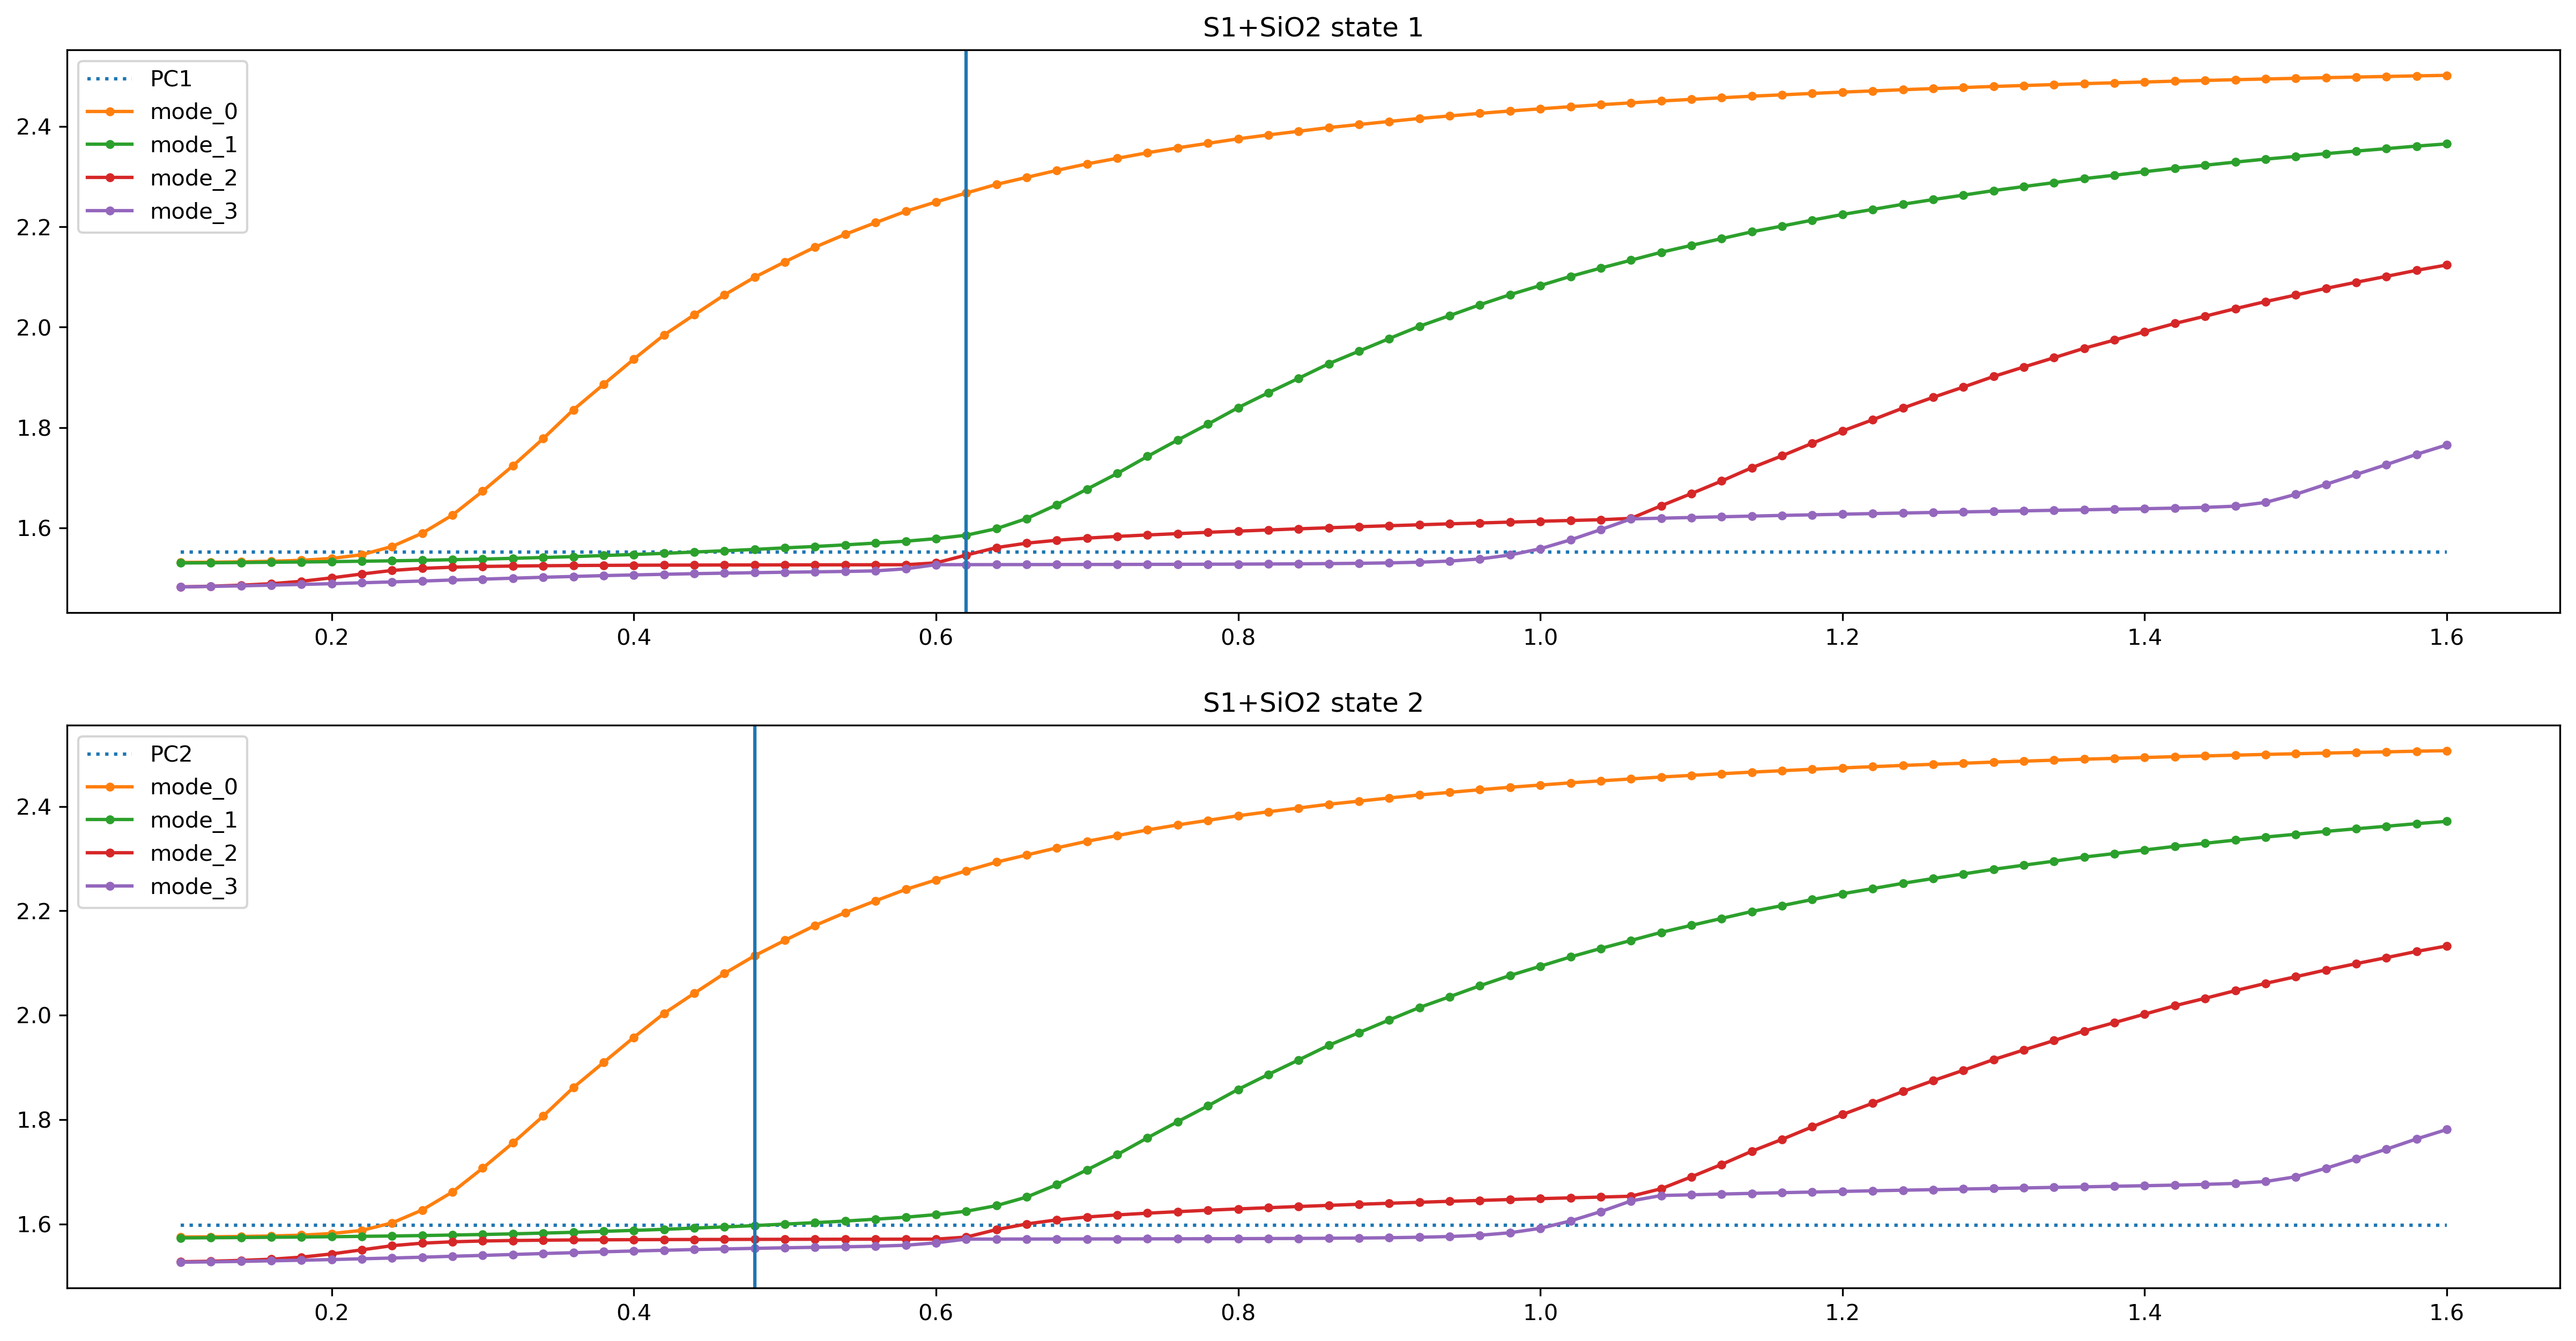

In [71]:
s = 1
setting_S2 = np.load(get_path(settings[s][0]))
plot_data_line(settings[s], setting_S1)

### 3. S2

0.62 0.48
0.62 0.48
0.62 0.48


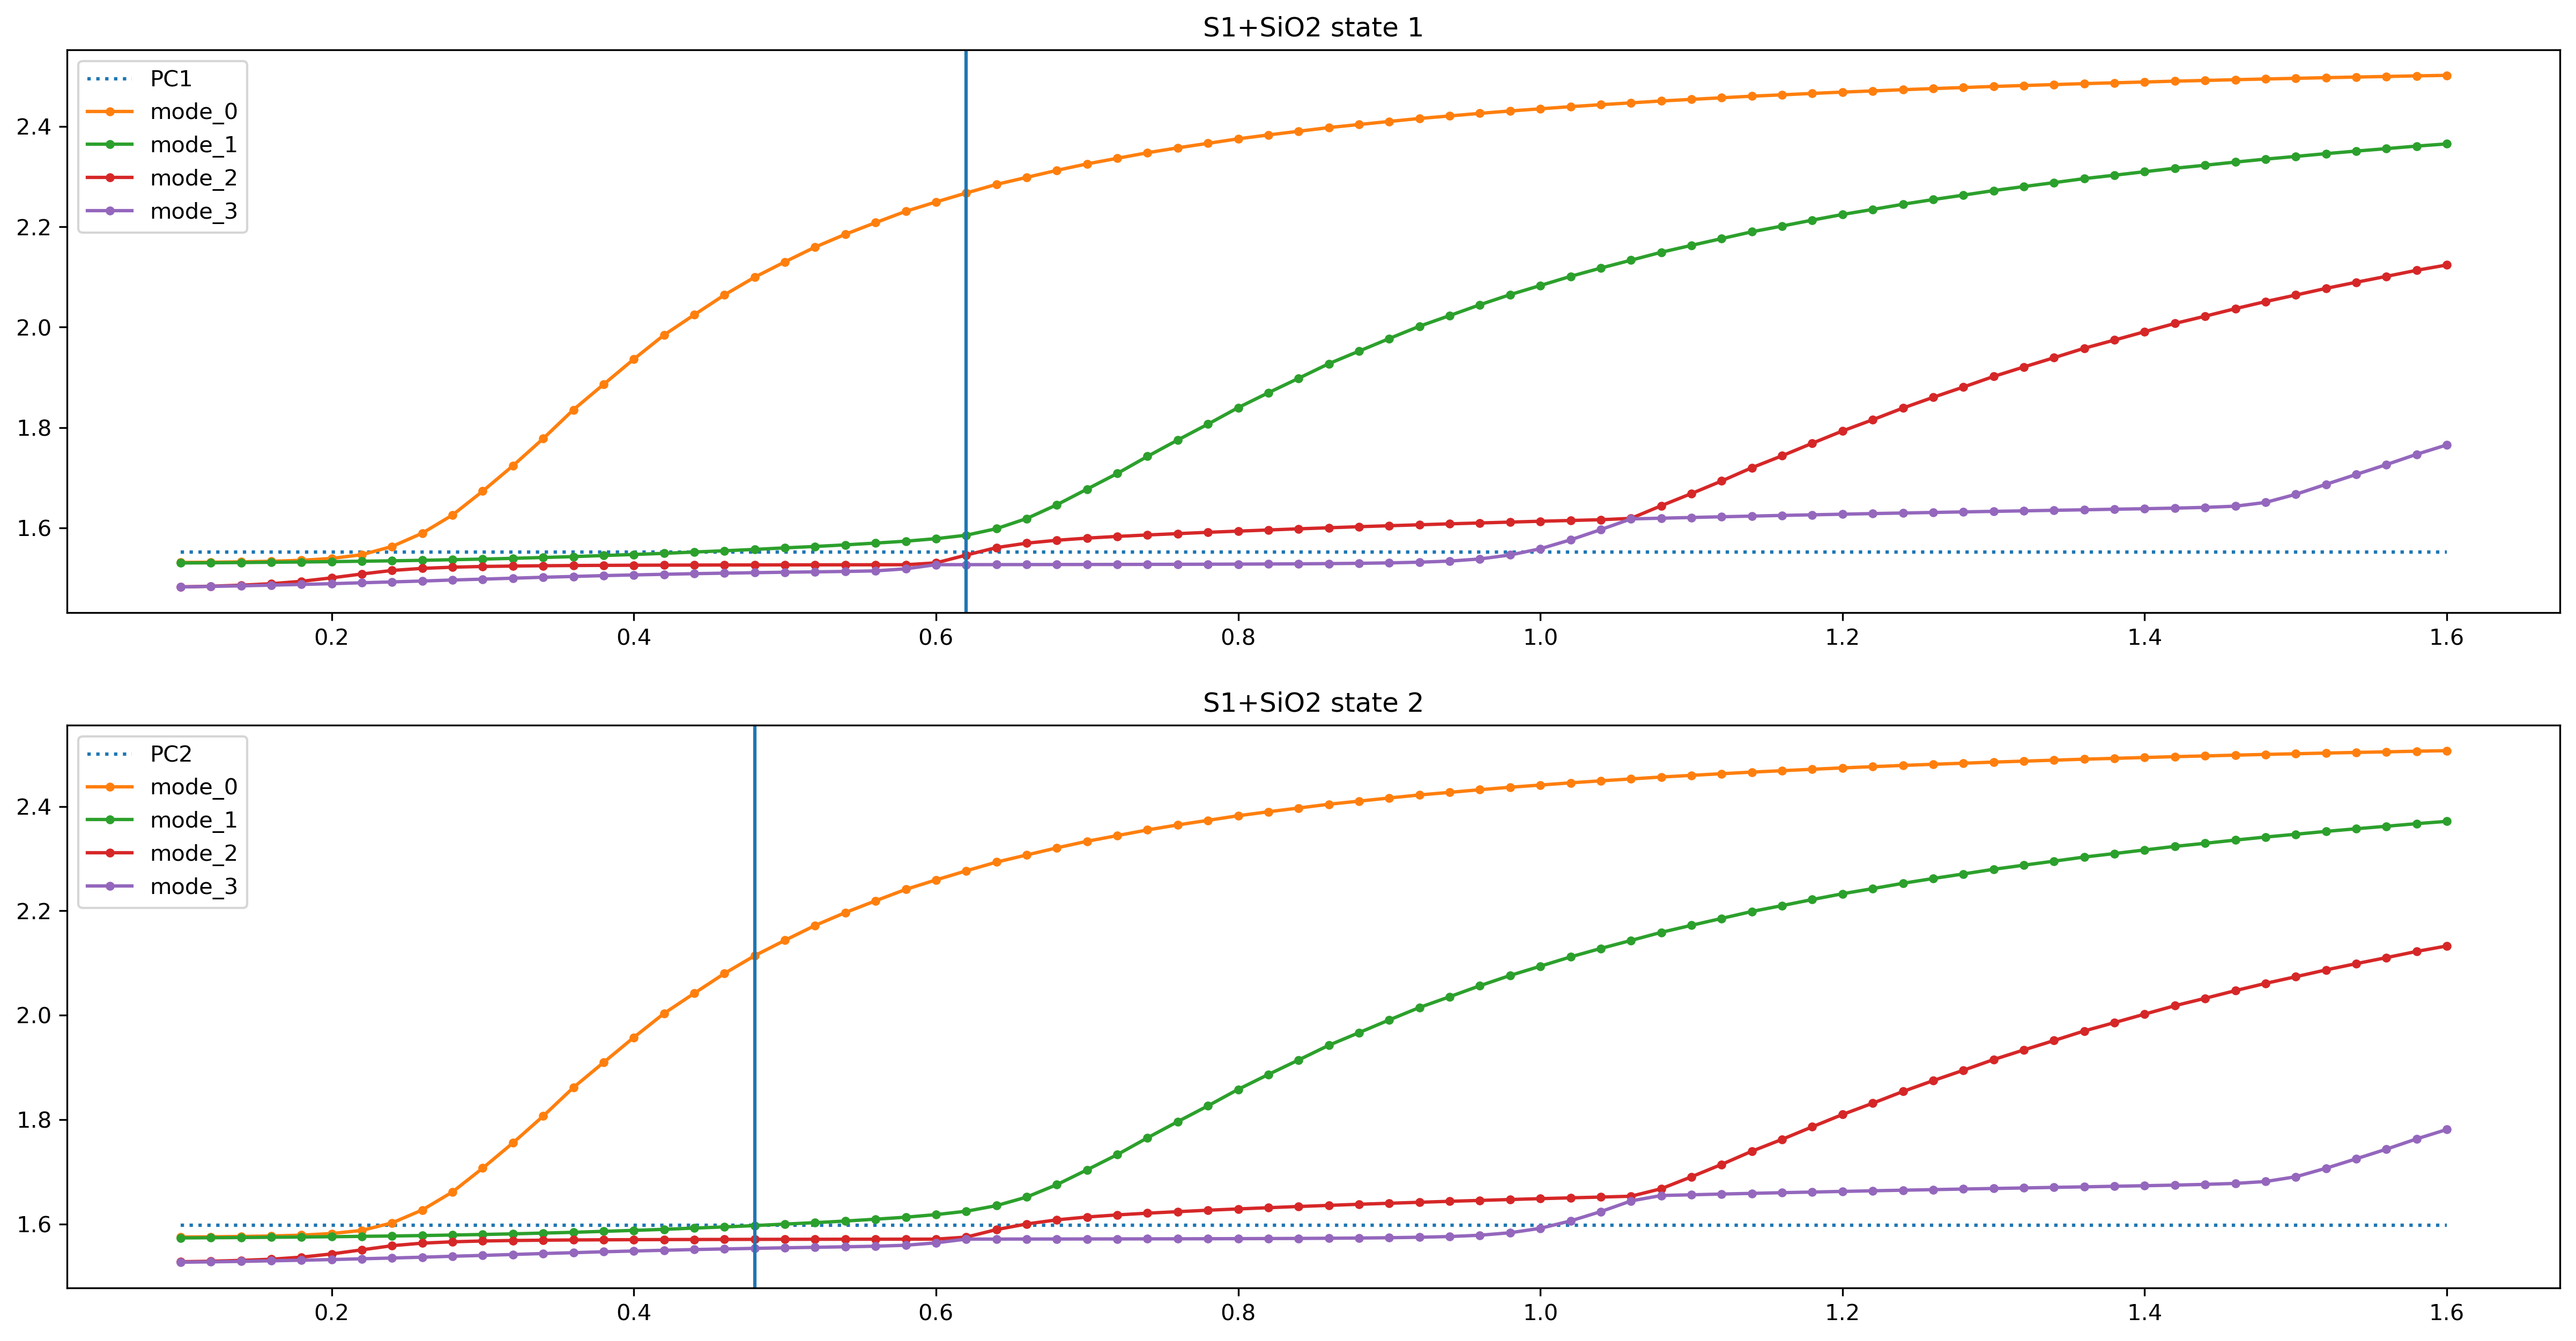

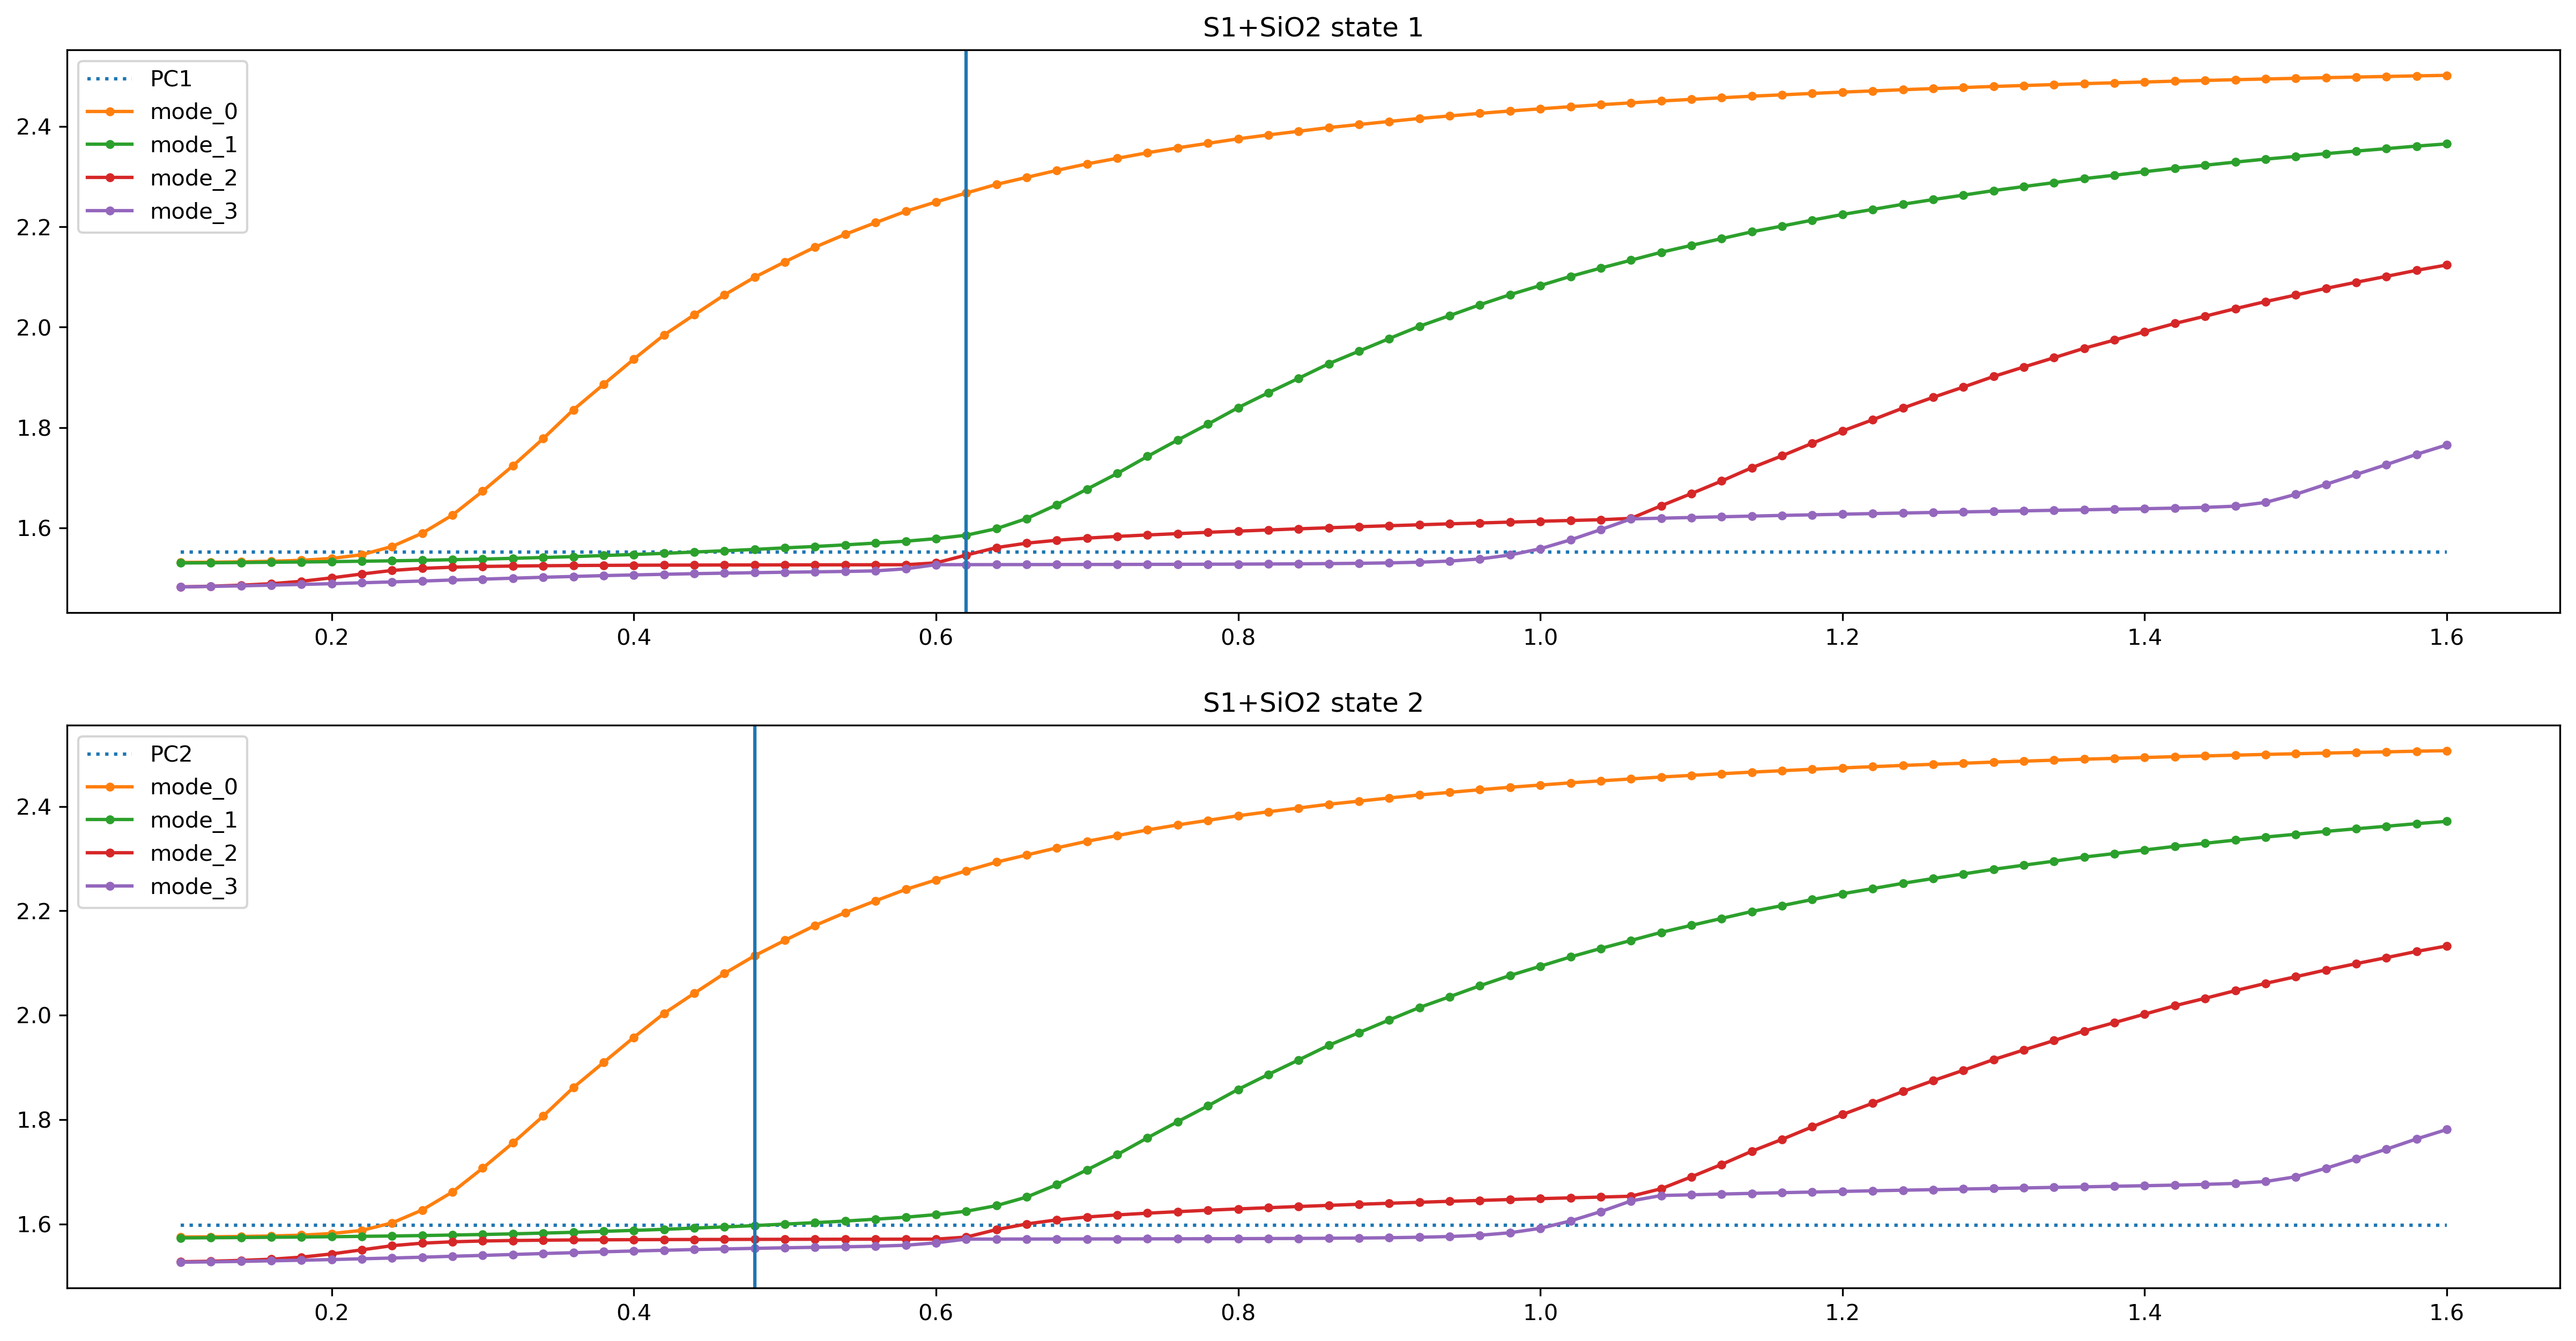

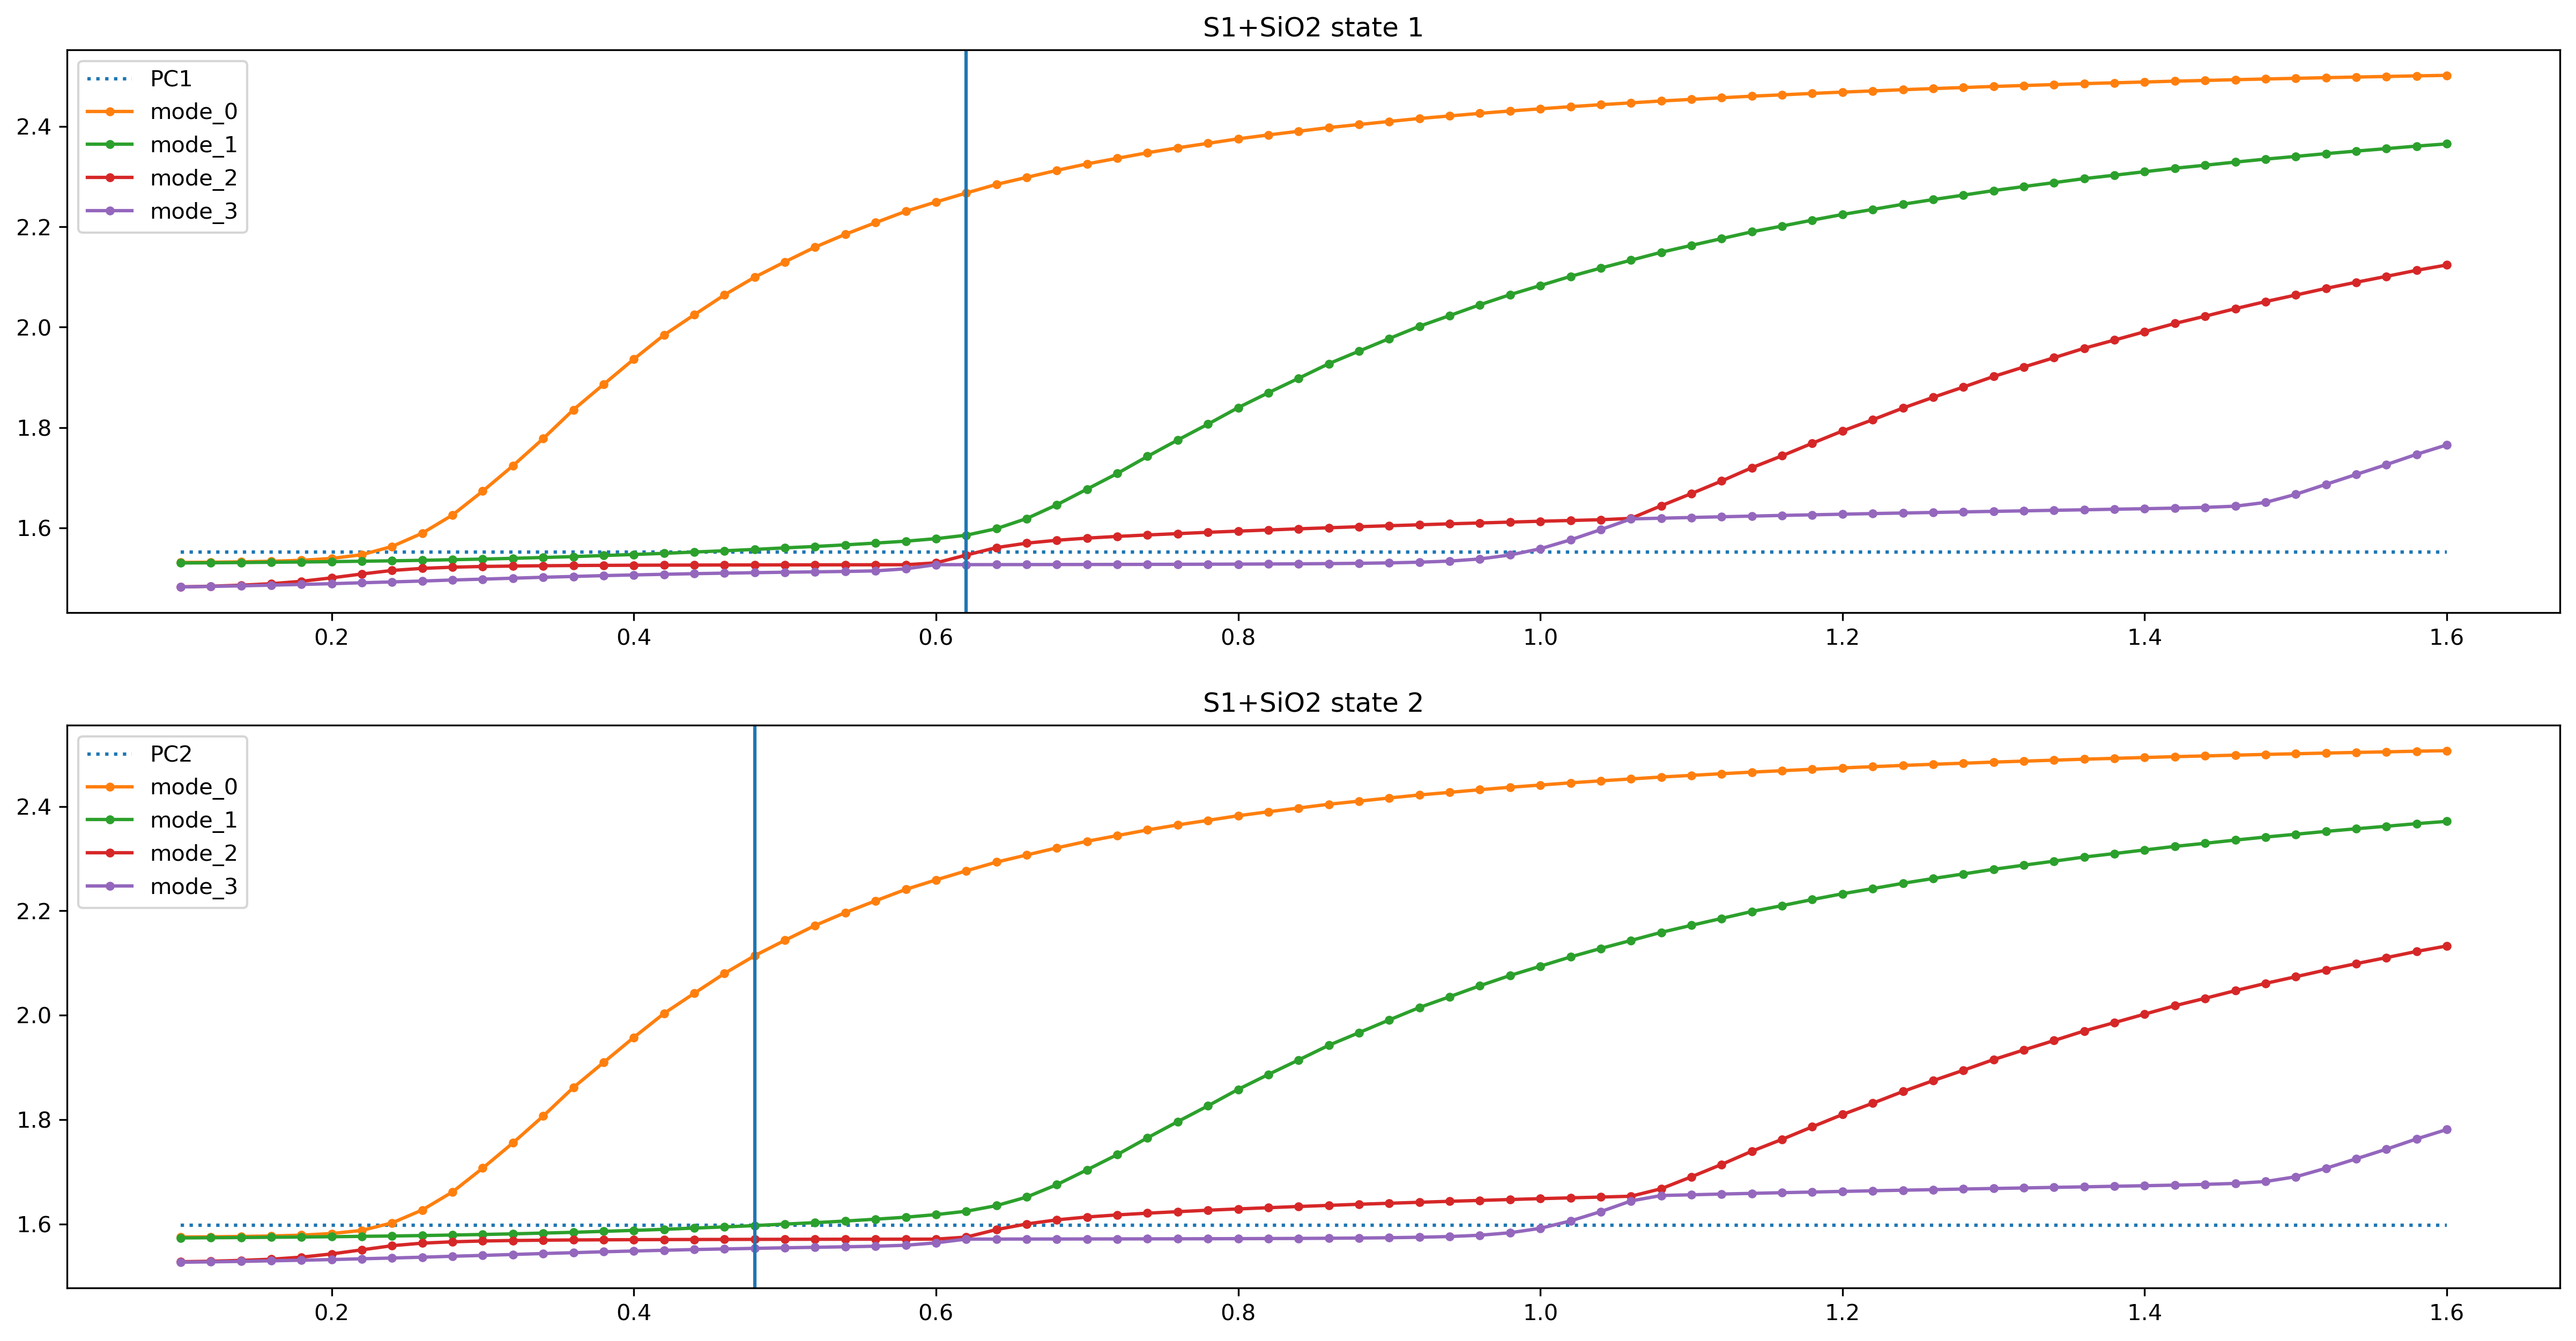

In [73]:
s = 1
setting_S2 = np.load(get_path(settings[s][0]))
plot_data_line(settings[s], setting_S1)
plot_data_line(settings[s], setting_S1, ws = setting_S2.shape[1] // 2)
plot_data_line(settings[s], setting_S1, ws = setting_S2.shape[1] - 1)

### 6. S3

### 10. S4